In [2]:
from ase.io.trajectory import TrajectoryWriter
from ase.io.trajectory import TrajectoryReader

import os
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid.inset_locator import InsetPosition

from publish_format import useLargeSize

In [12]:
WRD="./force_noforce_comparison"
region=[2, 4, 8, 16, 32, 48, 72]

In [3]:
distances = []
energies = []
forces = []

# for i in [2, 4, 8, 16, 32, 48, 64, 72, 128, 144, 160, 178, 256]:
for i in region:
    data_file = "{}/calculate/calculate_{}/data/compare_c2_calc.traj".format(WRD, i, i)
    ds = []
    es = []
    fs = []
    for image in TrajectoryReader(data_file):
        ds.append(image.get_distance(0, 1))
        es.append(image.get_potential_energy())
        fs.append(image.get_forces())
    distances.append(ds)
    energies.append(es)
    forces.append(fs)

In [17]:
reference_energy = [image.get_potential_energy() for image in TrajectoryReader("/users/chuang25/data/chuang25/github_repo/ml_qmc_force/examples/c2/test_dataset/dft_test_dataset/c2_calc.traj")]
reference_distance = [image.get_distance(0, 1) for image in TrajectoryReader("/users/chuang25/data/chuang25/github_repo/ml_qmc_force/examples/c2/test_dataset/dft_test_dataset/c2_calc.traj")]

[0.8694000000000006, 4.3469999999999995]
[0.61999975963717, 0.6819997350717104, 0.7439997105062508, 0.8059996859407903, 0.8679996613753298, 0.9299996368098702, 0.9919996122444088, 1.0539995876789492, 1.1159995631134896, 1.17799953854803, 1.2399995139825712, 1.3019994894171107, 1.3639994648516494, 1.4259994402861906, 1.4879994157207301, 1.5499993911552687, 1.611999366589811, 1.6739993420243504, 1.7359993174588908, 1.7979992928934303, 1.8599992683279698, 1.9219992437625102, 1.9839992191970497, 2.045999194631589, 2.1079991700661296, 2.16999914550067, 2.2319991209352095, 2.29399909636975, 2.3559990718042894, 2.4179990472388306, 2.479999022673371, 2.5419989981079105, 2.60399897354245, 2.6659989489769913, 2.727998924411531, 2.7899988998460703, 2.8519988752806107, 2.91399885071515, 2.975998826149689, 3.03799880158423, 3.0999987770187696, 3.161998752453309, 3.2239987278878504, 3.28599870332239, 3.3479986787569285, 3.4099986541914697, 3.471998629626011, 3.5339986050605496, 3.595998580495091, 3.

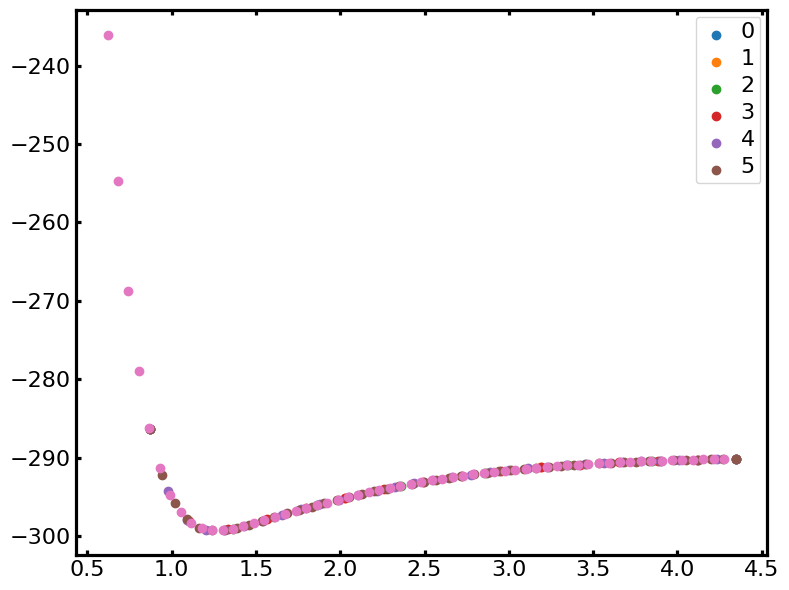

In [20]:
plt.style.use('default')

fig, ax = plt.subplots(figsize=(8,6))

for i in range(len(distances)):
    ax.scatter(distances[i], energies[i], label="{}".format(i))
# print(distances[0])
ax.scatter(reference_distance, reference_energy)
# print(reference_distance)
ax.legend()

useLargeSize(plt, ax)
plt.show()

In [21]:
force_train_energy_mae = []
force_train_force_mae = []

for i in region:
    files = os.listdir("{}/calculate/calculate_{}/force/train".format(WRD, i, i))
    for file in files:
        if "slurm" in file:
            with open("{}/calculate/calculate_{}/force/train/{}".format(WRD, i, file)) as f:
                lines = f.readlines()
    energy_mse = lines[-6].split()[-1]
    energy_mae = lines[-5].split()[-1]
    energy_rmse = lines[-4].split()[-1]
    force_mse = lines[-3].split()[-1]
    force_mae = lines[-2].split()[-1]
    force_rmse = lines[-1].split()[-1]
    force_train_energy_mae.append(float(energy_mae))
    force_train_force_mae.append(float(force_mae))

In [22]:
noforce_train_energy_mae = []
noforce_train_force_mae = []

for i in region:
    files = os.listdir("{}/calculate/calculate_{}/noforce/train".format(WRD, i, i))
    for file in files:
        if "slurm" in file:
            with open("{}/calculate/calculate_{}/noforce/train/{}".format(WRD, i, file)) as f:
                lines = f.readlines()
    energy_mse = lines[-6].split()[-1]
    energy_mae = lines[-5].split()[-1]
    energy_rmse = lines[-4].split()[-1]
    force_mse = lines[-3].split()[-1]
    force_mae = lines[-2].split()[-1]
    force_rmse = lines[-1].split()[-1]
    noforce_train_energy_mae.append(float(energy_mae))
    noforce_train_force_mae.append(float(force_mae))

In [8]:
print(force_train_energy_mae)
print(force_train_force_mae)
print(noforce_train_energy_mae)
print(noforce_train_force_mae)

[0.8113073574682422, 0.8267811759024019, 0.06783864262498913, 0.025066637382582968, 0.08706491631414792, 0.03607808212304459]
[5.427173576126033, 2.9197884863678634, 0.1493707255800932, 0.02695033131519842, 0.16191053024853716, 0.05999584132984023]
[0.7916743822078255, 0.525092784593582, 0.2661163269935282, 0.025930177484692507, 0.07468817983270763, 0.0266108836177897]
[5.428062344295648, 2.8949094245083242, 1.3888057231483233, 0.17911241067332717, 0.2711273003689848, 0.11038082514623644]


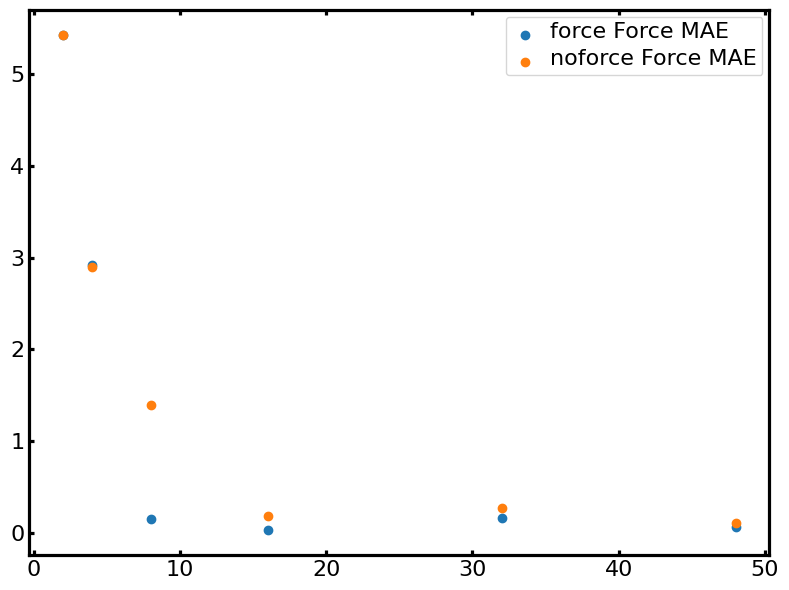

In [13]:
plt.style.use('default')

fig, ax = plt.subplots(figsize=(8,6))

# ax.scatter(region, force_train_energy_mae, label="force Energy MAE")
# ax.scatter(region, noforce_train_energy_mae, label="noforce Energy MAE")

ax.scatter(region, force_train_force_mae, label="force Force MAE")
ax.scatter(region, noforce_train_force_mae, label="noforce Force MAE")
ax.legend()


useLargeSize(plt, ax)
plt.show()

In [20]:
force_test_energy = {"mae": [], "mse": [], "rmse": []}
force_test_force = {"mae": [], "mse": [], "rmse": []}

for i in region:
    files = os.listdir("{}/calculate/calculate_{}/force/test".format(WRD, i, i))
    for file in files:
        if "slurm" in file:
            print(file)
            with open("{}/calculate/calculate_{}/force/test/{}".format(WRD, i, file)) as f:
                lines = f.readlines()
    force_test_energy["mae"].append(float(lines[-5].split()[-1]))
    force_test_energy["mse"].append(float(lines[-6].split()[-1]))
    force_test_energy["rmse"].append(float(lines[-4].split()[-1]))
    force_test_force["mae"].append(float(lines[-2].split()[-1]))
    force_test_force["mse"].append(float(lines[-3].split()[-1]))
    force_test_force["rmse"].append(float(lines[-1].split()[-1]))

noforce_test_energy = {"mae": [], "rmse": [], "mse": []}
noforce_test_force = {"mae": [], "rmse": [], "mse": []}

for i in region:
    files = os.listdir("{}/calculate/calculate_{}/noforce/test".format(WRD, i, i))
    for file in files:
        if "slurm" in file:
            print(file)
            with open("{}/calculate/calculate_{}/noforce/test/{}".format(WRD, i, file)) as f:
                lines = f.readlines()
    noforce_test_energy["mae"].append(float(lines[-5].split()[-1]))
    noforce_test_energy["rmse"].append(float(lines[-4].split()[-1]))
    noforce_test_energy["mse"].append(float(lines[-6].split()[-1]))
    noforce_test_force["mae"].append(float(lines[-2].split()[-1]))
    noforce_test_force["rmse"].append(float(lines[-1].split()[-1]))
    noforce_test_force["mse"].append(float(lines[-3].split()[-1]))

slurm-5209258.out
slurm-5209259.out
slurm-5209260.out
slurm-5209261.out
slurm-5209262.out
slurm-5209263.out
slurm-5209318.out
slurm-5209252.out
slurm-5209253.out
slurm-5209254.out
slurm-5209255.out
slurm-5209256.out
slurm-5209257.out
slurm-5209319.out


In [26]:
print(force_test_energy["mae"])
print(noforce_test_energy["mae"])
print(force_test_force["mae"])
print(noforce_test_force["mae"])

[3.2646069282745125, 3.4696087775963185, 0.19089529809705397, 0.05549575458539616, 0.2475036553243418, 0.10823424636913377, 0.0741911135244943]
[3.3240844164743826, 2.957037738700457, 1.0819367361008148, 0.08897496122729365, 0.23599354820506827, 0.0798326508533691, 0.06309790961737367]
[9.903883726701297, 10.086559652095197, 1.5708497822243166, 0.48321295783239476, 2.0272716368384285, 0.7635866493595561, 0.8093085220217292]
[10.014328849246262, 8.50900829890576, 6.990401754239039, 1.874090423430219, 3.3714614509392544, 2.443183739274278, 2.584081412518555]


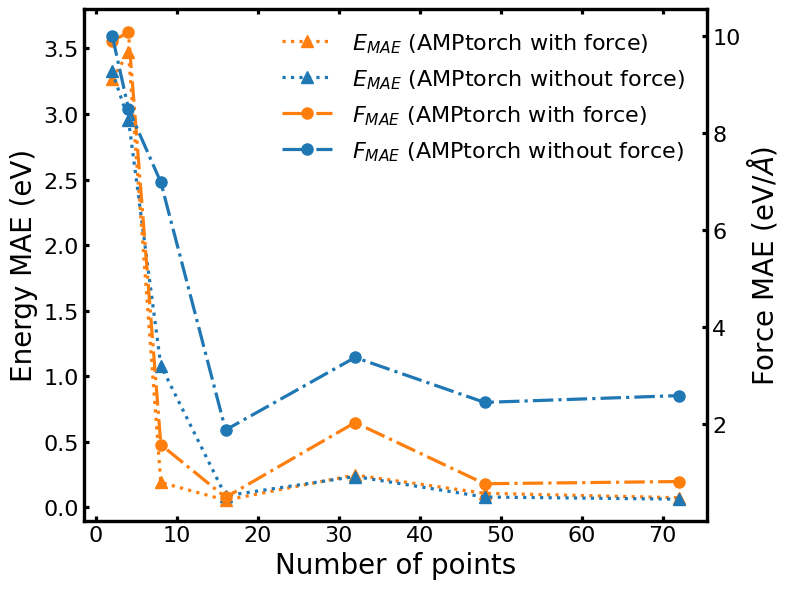

In [53]:
plt.style.use('default')

fig, ax1 = plt.subplots(figsize=(8,6))

l1 = ax1.plot(region, force_test_energy["mae"], c="tab:orange", marker="^", linestyle="dotted", markersize=8, label=r"$E_{MAE}$ (AMPtorch with force)")
l2 = ax1.plot(region, noforce_test_energy["mae"], c="tab:blue", marker="^", linestyle="dotted", markersize=8, label=r"$E_{MAE}$ (AMPtorch without force)")
ax1.set_ylim(-0.1, 3.8)

ax2 = ax1.twinx()
l3 = ax2.plot(region, force_test_force["mae"], c="tab:orange", marker="o", linestyle="-.", markersize=8, label=r"$F_{MAE}$ (AMPtorch with force)")
l4 = ax2.plot(region, noforce_test_force["mae"], c="tab:blue", marker="o", linestyle="-.", markersize=8, label=r"$F_{MAE}$ (AMPtorch without force)")

ax1.set_xlabel("Number of points")
ax1.set_ylabel("Energy MAE (eV)")
ax2.set_ylabel(r"Force MAE (eV/${\AA}$)")

lines = l1 + l2 + l3 + l4
labs = [l.get_label() for l in lines]
ax1.legend(lines, labs, loc=0, frameon=False, fontsize=18)

useLargeSize(plt, ax1)
useLargeSize(plt, ax2)
plt.savefig("./figures/number_points_force_without_force.png", dpi=300)
plt.show()

In [4]:
data = TrajectoryReader("/users/chuang25/data/chuang25/github_repo/ml_qmc_force/examples/c2/amptorch_dmc/envelope_calculation/c2_amptorch_dmc.traj")

d = []
energy = []

for image in data:
    d.append(image.get_distance(0, 1))
    energy.append(image.get_potential_energy())

energy = np.array(energy)
energy -= min(energy)

for _d, _e in zip(d, energy):
    print(_d, _e)

0.9935999999999998 4.20599365234375
0.9948420000000002 4.15118408203125
0.9960840000000006 4.096832275390625
0.9960840000000006 4.096832275390625
0.9973260000000002 4.042938232421875
0.9985680000000006 3.989471435546875
0.9998100000000001 3.93646240234375
1.0010520000000005 3.883880615234375
1.0010520000000005 3.883880615234375
1.002294000000001 3.831787109375
1.0035360000000004 3.78009033203125
1.004778 3.728851318359375
1.0060200000000004 3.67803955078125
1.0060200000000004 3.67803955078125
1.0072620000000008 3.627685546875
1.0085040000000003 3.577789306640625
1.0097460000000007 3.5283203125
1.010988000000001 3.479248046875
1.010988000000001 3.479248046875
1.0122299999999989 3.4306640625
1.0134720000000002 3.38250732421875
1.0147140000000006 3.334747314453125
1.015956 3.287445068359375
1.015956 3.287445068359375
1.0171979999999996 3.240570068359375
1.018440000000001 3.19415283203125
1.0196820000000004 3.14813232421875
1.020924 3.1025390625
1.020924 3.1025390625
1.0221660000000004 3.0